In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

### Import Data

In [2]:
df =  pd.read_csv("Concrete_Data.csv")

In [3]:
df.rename(
    columns=
    {
        "Cement (component 1)(kg in a m^3 mixture)":"Cement",
        "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":"BFS",
        "Fly Ash (component 3)(kg in a m^3 mixture)":"Fly_Ash",
        "Water  (component 4)(kg in a m^3 mixture)":"Water",
        "Superplasticizer (component 5)(kg in a m^3 mixture)":"Superplasticizer",
        "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":"Coarse_Aggregate",
        "Fine Aggregate (component 7)(kg in a m^3 mixture)":"Fine_Aggregate",
        "Age (day)":"Age",
        "Concrete compressive strength(MPa, megapascals) ":"Concrete_Strength"
    },
    inplace=True
)

### Exploratory Data Analysis

In [4]:
df.head()

,Cement,BFS,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.tail()

,Cement,BFS,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cement             1030 non-null   float64
 1   BFS                1030 non-null   float64
 2   Fly_Ash            1030 non-null   float64
 3   Water              1030 non-null   float64
 4   Superplasticizer   1030 non-null   float64
 5   Coarse_Aggregate   1030 non-null   float64
 6   Fine_Aggregate     1030 non-null   float64
 7   Age                1030 non-null   int64  
 8   Concrete_Strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(1005, 9)

In [9]:
stat = df.describe()
stat.to_csv("Statistics Table.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cement             1005 non-null   float64
 1   BFS                1005 non-null   float64
 2   Fly_Ash            1005 non-null   float64
 3   Water              1005 non-null   float64
 4   Superplasticizer   1005 non-null   float64
 5   Coarse_Aggregate   1005 non-null   float64
 6   Fine_Aggregate     1005 non-null   float64
 7   Age                1005 non-null   int64  
 8   Concrete_Strength  1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


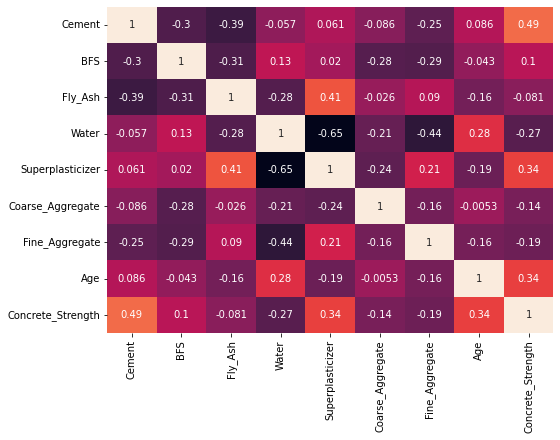

In [11]:
#plt.figure(figsize= [8,6])
fig, ax = plt.subplots(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, cbar=False, annot=True)
fig.savefig('correlation.jpg');

### Split Data to Train and Test Set

In [12]:
# Attributes or Features are saved as X
X = df.drop(columns="Concrete_Strength")

# Target labels are saved as y
y = df["Concrete_Strength"]

In [13]:
# Splitting the data set into train and test dataset. Train=80%, Test=20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ",y_test.shape)

X_train shape :  (804, 8)
X_test shape :  (201, 8)
y_train shape :  (804,)
y_test shape :  (201,)


### Model Building

### Grid Search

#### Lasso

In [15]:
lasso =  Lasso(random_state=42)
lasso_model = make_pipeline(
    StandardScaler(),
    lasso
)

In [16]:
#hyperparameters
params= {
    "lasso__alpha":np.arange(0.05, 1.05, 0.05),
    "lasso__max_iter":np.arange(500, 1500, 100),
    "lasso__selection":["cyclic", "random"]
}

In [17]:
model_lasso = GridSearchCV(lasso_model, param_grid=params, n_jobs=-1, verbose=1, cv=5)
model_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso(random_state=42))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
                         'lasso__max_iter': array([ 500,  600,  700,  800,  900, 1000, 1100, 1200, 1300, 1400]),
                         'lasso__selection': ['cyclic', 'random']},
             verbose=1)

In [18]:
model_lasso.best_params_

{'lasso__alpha': 0.1, 'lasso__max_iter': 500, 'lasso__selection': 'random'}

In [19]:
model_lasso.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=0.1, max_iter=500, random_state=42,
                       selection='random'))])

In [20]:
model_lasso.best_score_

0.5930080096575383

In [21]:
pd.DataFrame(model_lasso.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso__alpha,param_lasso__max_iter,param_lasso__selection,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,0.010194,0.001938,0.003798,3.997089e-04,0.1,600,random,"{'lasso__alpha': 0.1, 'lasso__max_iter': 600, ...",0.585822,0.549062,0.652331,0.630084,0.547742,0.593008,0.042251,1
25,0.010792,0.001467,0.003998,6.143617e-07,0.1,700,random,"{'lasso__alpha': 0.1, 'lasso__max_iter': 700, ...",0.585822,0.549062,0.652331,0.630084,0.547742,0.593008,0.042251,1
39,0.009395,0.000490,0.003999,3.179471e-06,0.1,1400,random,"{'lasso__alpha': 0.1, 'lasso__max_iter': 1400,...",0.585822,0.549062,0.652331,0.630084,0.547742,0.593008,0.042251,1
37,0.010042,0.001054,0.003998,9.464947e-07,0.1,1300,random,"{'lasso__alpha': 0.1, 'lasso__max_iter': 1300,...",0.585822,0.549062,0.652331,0.630084,0.547742,0.593008,0.042251,1
27,0.009593,0.000489,0.003398,4.898822e-04,0.1,800,random,"{'lasso__alpha': 0.1, 'lasso__max_iter': 800, ...",0.585822,0.549062,0.652331,0.630084,0.547742,0.593008,0.042251,1


In [22]:
pred = model_lasso.predict(X_test)

In [23]:
rsquared = r2_score(y_test, pred)
rsquared

0.5773020810998549

#### Ridge

In [24]:
ridge =  Ridge(random_state=42)
ridge_model = make_pipeline(
    StandardScaler(),
    ridge
)
#hyperparameters
params= {
    "ridge__alpha":np.arange(0.05, 1.05, 0.05)
}

In [25]:
model_ridge = GridSearchCV(ridge_model, param_grid=params, n_jobs=-1, verbose=1, cv=5)
model_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge(random_state=42))]),
             n_jobs=-1,
             param_grid={'ridge__alpha': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
             verbose=1)

In [26]:
model_ridge.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(random_state=42))])

In [27]:
model_ridge.best_params_

{'ridge__alpha': 1.0}

In [28]:
model_ridge.best_score_

0.5935198027647656

In [29]:
pd.DataFrame(model_ridge.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,0.009394,1.355503e-03,0.003398,0.000490,1.0,{'ridge__alpha': 1.0},0.583458,0.549068,0.657139,0.631614,0.546320,0.593520,0.044280,1
18,0.009594,1.199174e-03,0.004997,0.002096,0.95,{'ridge__alpha': 0.9500000000000001},0.583438,0.549070,0.657181,0.631614,0.546289,0.593518,0.044299,2
17,0.008395,4.895900e-04,0.004398,0.001355,0.9,{'ridge__alpha': 0.9000000000000001},0.583417,0.549072,0.657223,0.631614,0.546259,0.593517,0.044318,3
16,0.008595,8.002997e-04,0.003799,0.000396,0.85,{'ridge__alpha': 0.8500000000000001},0.583396,0.549074,0.657265,0.631614,0.546228,0.593515,0.044337,4
15,0.007995,2.780415e-07,0.003799,0.000400,0.8,{'ridge__alpha': 0.8},0.583375,0.549076,0.657306,0.631613,0.546196,0.593513,0.044357,5


#### Decision Tree

In [30]:
dt =  DecisionTreeRegressor(random_state=42)
dt_model = make_pipeline(
    StandardScaler(),
    dt
)
#hyperparameters
params= {
    "decisiontreeregressor__max_depth":np.arange(1, 100, 5),
    "decisiontreeregressor__splitter":["best", "random"]
}

In [31]:
model_dt = GridSearchCV(dt_model, param_grid=params, n_jobs=-1, verbose=1, cv=5)
model_dt.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeregressor__max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]),
                         'decisiontreeregressor__splitter': ['best', 'random']},
             verbose=1)

In [32]:
model_dt.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=16, random_state=42))])

In [33]:
model_dt.best_score_

0.7988896083430337

In [34]:
pd.DataFrame(model_dt.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeregressor__max_depth,param_decisiontreeregressor__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.014791,0.001470,0.004197,0.000400,16,best,"{'decisiontreeregressor__max_depth': 16, 'deci...",0.805619,0.800520,0.836403,0.740261,0.811644,0.798890,0.031797,1
12,0.020987,0.009029,0.010995,0.011361,31,best,"{'decisiontreeregressor__max_depth': 31, 'deci...",0.804026,0.763804,0.822382,0.746891,0.819002,0.791221,0.030409,2
22,0.018189,0.007462,0.003798,0.000748,56,best,"{'decisiontreeregressor__max_depth': 56, 'deci...",0.804026,0.763804,0.822382,0.746891,0.819002,0.791221,0.030409,2
28,0.029583,0.017062,0.004198,0.000748,71,best,"{'decisiontreeregressor__max_depth': 71, 'deci...",0.804026,0.763804,0.822382,0.746891,0.819002,0.791221,0.030409,2
20,0.020387,0.008541,0.006397,0.004314,51,best,"{'decisiontreeregressor__max_depth': 51, 'deci...",0.804026,0.763804,0.822382,0.746891,0.819002,0.791221,0.030409,2


#### Random Forest

In [35]:
rf =  RandomForestRegressor(random_state=42)
rf_model = make_pipeline(
    StandardScaler(),
    rf
)
#hyperparameters
params= {
    "randomforestregressor__max_depth":np.arange(10, 100, 10),
    "randomforestregressor__n_estimators":np.arange(50, 500, 50)
}

In [36]:
model_rf = GridSearchCV(rf_model, param_grid=params, n_jobs=-1, verbose=1, cv=5)
model_rf.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                         'randomforestregressor__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
             verbose=1)

In [37]:
model_rf.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, n_estimators=450,
                                       random_state=42))])

In [38]:
model_rf.best_score_

0.8879195249733101

In [39]:
pd.DataFrame(model_rf.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_depth,param_randomforestregressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,3.035942,0.046845,0.126528,0.038824,20,450,"{'randomforestregressor__max_depth': 20, 'rand...",0.886971,0.897656,0.895698,0.880370,0.878903,0.887920,0.007675,1
16,2.761790,0.033779,0.094145,0.005703,20,400,"{'randomforestregressor__max_depth': 20, 'rand...",0.886531,0.897799,0.896089,0.880111,0.879020,0.887910,0.007829,2
80,2.897107,0.053764,0.099431,0.018495,90,450,"{'randomforestregressor__max_depth': 90, 'rand...",0.887144,0.897630,0.895576,0.880401,0.878785,0.887907,0.007662,3
44,3.036751,0.117213,0.111977,0.004104,50,450,"{'randomforestregressor__max_depth': 50, 'rand...",0.887144,0.897630,0.895576,0.880401,0.878785,0.887907,0.007662,3
35,3.319468,0.255719,0.103742,0.006046,40,450,"{'randomforestregressor__max_depth': 40, 'rand...",0.887144,0.897630,0.895576,0.880401,0.878785,0.887907,0.007662,3


#### Gradient Boosting

In [40]:
gb = GradientBoostingRegressor(random_state=42)
gb_model = make_pipeline(
    StandardScaler(),
    gb
)
#hyperparameters
params= {
    "gradientboostingregressor__learning_rate":np.arange(0.1, 0.5, 0.1),
    "gradientboostingregressor__n_estimators":np.arange(50, 201, 50),
    "gradientboostingregressor__max_depth":np.arange(2, 11, 2)
}

In [41]:
model_gb = GridSearchCV(gb_model, param_grid=params, n_jobs=-1, verbose=1, cv=5)
model_gb.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__learning_rate': array([0.1, 0.2, 0.3, 0.4]),
                         'gradientboostingregressor__max_depth': array([ 2,  4,  6,  8, 10]),
                         'gradientboostingregressor__n_estimators': array([ 50, 100, 150, 200])},
             verbose=1)

In [42]:
model_gb.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.2, max_depth=4,
                                           n_estimators=200,
                                           random_state=42))])

In [43]:
model_gb.best_score_

0.9141014280493606

In [44]:
pd.DataFrame(model_gb.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingregressor__learning_rate,param_gradientboostingregressor__max_depth,param_gradientboostingregressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,0.466124,0.005379,0.005198,0.000400,0.2,4,200,{'gradientboostingregressor__learning_rate': 0...,0.905674,0.929244,0.922552,0.905000,0.908037,0.914101,0.009913,1
26,0.350154,0.005943,0.004798,0.000400,0.2,4,150,{'gradientboostingregressor__learning_rate': 0...,0.905517,0.929148,0.921514,0.903820,0.906010,0.913202,0.010219,2
7,0.539586,0.024725,0.005197,0.000401,0.1,4,200,{'gradientboostingregressor__learning_rate': 0...,0.901894,0.923919,0.927276,0.906811,0.898625,0.911705,0.011687,3
25,0.245098,0.012351,0.004598,0.000490,0.2,4,100,{'gradientboostingregressor__learning_rate': 0...,0.903605,0.929304,0.916919,0.898068,0.903345,0.910248,0.011382,4
47,0.500719,0.011210,0.005398,0.000489,0.3,4,200,{'gradientboostingregressor__learning_rate': 0...,0.895060,0.926343,0.923510,0.899139,0.901299,0.909070,0.013131,5


#### KNN

In [45]:
knn = KNeighborsRegressor()
knn_model = make_pipeline(
    StandardScaler(),
    knn
)
#hyperparameters
params= {
    "kneighborsregressor__n_neighbors":np.arange(3, 13, 1),
    "kneighborsregressor__weights":["uniform", "distance"]
}

In [46]:
model_knn = GridSearchCV(knn_model, param_grid=params, n_jobs=-1, verbose=10, cv=5)
model_knn.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'kneighborsregressor__n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             verbose=10)

In [47]:
model_knn.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=7, weights='distance'))])

In [48]:
model_knn.best_score_

0.7018578697068684

In [49]:
model_knn.best_params_

{'kneighborsregressor__n_neighbors': 7,
 'kneighborsregressor__weights': 'distance'}

In [50]:
pd.DataFrame(model_knn.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__n_neighbors,param_kneighborsregressor__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.009594,0.000490,0.007996,0.000894,7,distance,"{'kneighborsregressor__n_neighbors': 7, 'kneig...",0.660789,0.732009,0.717781,0.770603,0.628107,0.701858,0.051018,1
13,0.010394,0.001200,0.008396,0.000490,9,distance,"{'kneighborsregressor__n_neighbors': 9, 'kneig...",0.646825,0.725046,0.707935,0.778041,0.646831,0.700936,0.049862,2
11,0.010794,0.000748,0.007596,0.000489,8,distance,"{'kneighborsregressor__n_neighbors': 8, 'kneig...",0.652897,0.726354,0.710641,0.772957,0.640064,0.700583,0.048867,3
15,0.009394,0.000489,0.010432,0.002788,10,distance,"{'kneighborsregressor__n_neighbors': 10, 'knei...",0.643849,0.723877,0.706420,0.776781,0.645761,0.699338,0.050198,4
17,0.010031,0.000576,0.008632,0.000448,11,distance,"{'kneighborsregressor__n_neighbors': 11, 'knei...",0.638874,0.715595,0.703475,0.781531,0.647961,0.697487,0.051605,5


# Final Models

In [51]:
# Make Pipeline
models = {
    'LR': LinearRegression(n_jobs=-1),
    'DT': DecisionTreeRegressor(random_state=42, max_depth=16),
    'RF': RandomForestRegressor(n_estimators=450, max_depth=20, random_state=42),
    'GB': GradientBoostingRegressor(max_depth=4, learning_rate=0.2, n_estimators=200),
    'KNN': KNeighborsRegressor(n_neighbors=7, weights="distance")
}

train_mae = []
train_r2 = []
train_rmse = []
train_mape = []
test_mae = []
test_r2 = []
test_rmse = []
test_mape = []

for model in models.values():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    train_r2.append(r2_score(y_train, y_train_pred))
    train_rmse.append((mean_squared_error(y_train, y_train_pred))**0.5)
    train_mape.append(mean_absolute_percentage_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_mae.append(mean_absolute_error(y_test, y_test_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    test_rmse.append((mean_squared_error(y_test, y_test_pred))**0.5)
    test_mape.append(mean_absolute_percentage_error(y_test, y_test_pred))

In [52]:
y_test_pred = models["GB"].predict(X_test)
predicted_values = pd.DataFrame({"y_test": y_test, "y_pred_test": y_test_pred}).reset_index(drop=True)
predicted_values.head()

,y_test,y_pred_test
0,19.01,19.823062
1,24.29,25.128104
2,26.32,22.266542
3,34.57,34.434091
4,44.13,45.178153


In [53]:
result = pd.DataFrame({'Train MAE':train_mae, 'Train R2':train_r2, 'Train RMSE':train_rmse, 'Train MAPE':train_mape, 'Test MAE':test_mae, 
                       'Test R2':test_r2, 'Test RMSE':test_rmse, 'Test MAPE':test_mape}, index=models.keys())
result

,Train MAE,Train R2,Train RMSE,Train MAPE,Test MAE,Test R2,Test RMSE,Test MAPE
LR,7.959910,0.609867,10.001795,0.308019,8.895256,0.580170,11.191320,0.346852
DT,0.096016,0.996391,0.962022,0.002588,3.850025,0.878371,6.023704,0.138957
RF,1.358437,0.983892,2.032345,0.047150,3.487651,0.910149,5.177321,0.122384
GB,0.882291,0.991214,1.500920,0.031605,2.679768,0.937720,4.310406,0.093655
KNN,0.094436,0.996395,0.961501,0.002556,5.813226,0.759190,8.475817,0.225459


In [54]:
result.to_csv("Metrics Table.csv")

In [55]:
result_train = pd.DataFrame({'MAE':train_mae, 'R2':train_r2, 'RMSE':train_rmse, 'MAPE':train_mape}, index=models.keys())
result_train.to_csv("Train Metrics Table.csv")

In [56]:
result_test = pd.DataFrame({'MAE':test_mae, 'R2':test_r2, 'RMSE':test_rmse, 'MAPE':test_mape}, index=models.keys())
result_test.to_csv("Test Metrics Table.csv")

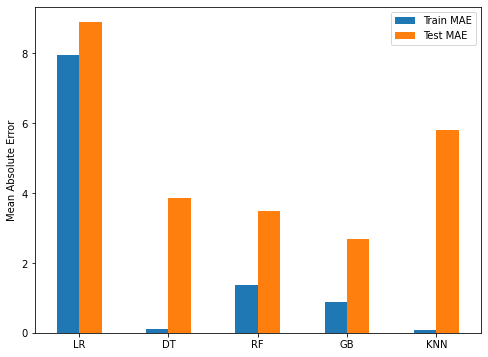

In [57]:
result[['Train MAE','Test MAE']].plot(kind='bar',figsize=(8, 6))
plt.ylabel('Mean Absolute Error')
#plt.ylim([60, 100])
plt.xticks(rotation=0)
plt.legend();
plt.savefig('MAE Chart.jpg')

In [58]:
intercept = models['LR'].intercept_
coef = models['LR'].coef_

In [59]:
print(f"Concrete Strength = ",intercept.round(4), "+ (", X.columns[0], "*", coef[0].round(4),
      ") + (", X.columns[1], "*", coef[1].round(4),") + (", X.columns[2], "*", coef[2].round(4),
      ") + (", X.columns[3], "*", coef[3].round(4),") + (",X.columns[4], "*", coef[4].round(4),
      ") + (", X.columns[5], "*", coef[5].round(4),") + (", X.columns[6], "*", coef[6].round(4),
      ") + (",X.columns[7], "*", coef[7].round(4),")") 

Concrete Strength =  -23.3893 + ( Cement * 0.1167 ) + ( BFS * 0.0981 ) + ( Fly_Ash * 0.0846 ) + ( Water * -0.1314 ) + ( Superplasticizer * 0.3315 ) + ( Coarse_Aggregate * 0.0155 ) + ( Fine_Aggregate * 0.0206 ) + ( Age * 0.1106 )


In [60]:
models["DT"].feature_importances_

array([0.35676258, 0.09367847, 0.01093619, 0.12127835, 0.04092443,
       0.01894369, 0.03474516, 0.32273115])

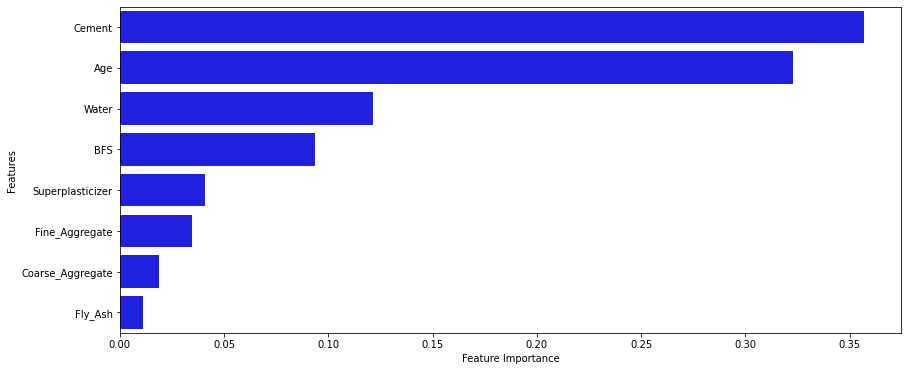

In [61]:
fig, ax = plt.subplots(figsize=(14,6))
feat_imp_dt = pd.DataFrame({"Features":X.columns, "Feature Importance": models["DT"].feature_importances_}).sort_values("Feature Importance", ascending=False)
sns.barplot(data=feat_imp_dt,y="Features", x="Feature Importance", color="Blue")
fig.savefig('Decision Tree Feature Importance.jpg');

In [62]:
feat_imp_dt.to_csv("DT Feat Importance.csv")

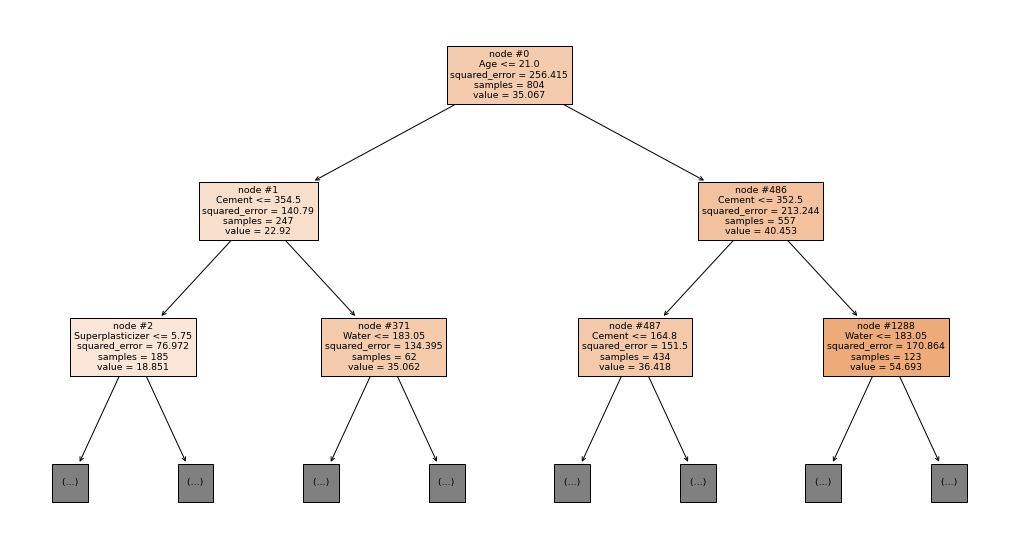

In [63]:
fig, ax = plt.subplots(figsize=(18, 10))
plot_tree(
    models["DT"],
    filled=True,
    max_depth=2,
    node_ids=True,
    feature_names=X_train.columns,
    class_names=y.name
)
plt.savefig("tree.png");

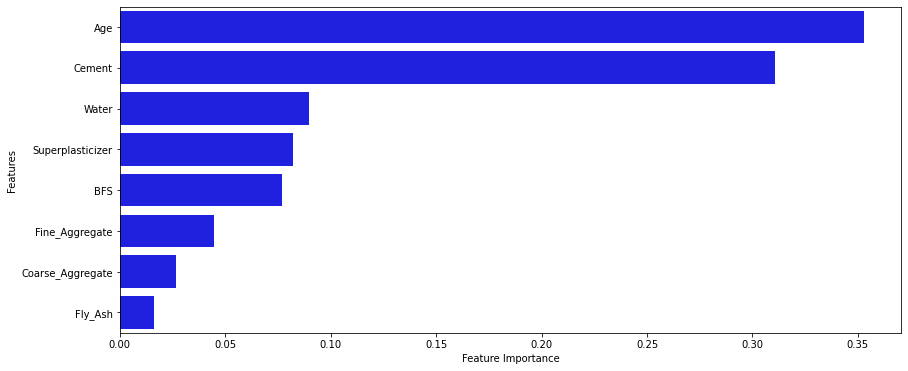

In [64]:
fig, ax = plt.subplots(figsize=(14,6))
feat_imp_rf = pd.DataFrame({"Features":X.columns, "Feature Importance": models["RF"].feature_importances_}).sort_values("Feature Importance", ascending=False)
sns.barplot(data=feat_imp_rf,y="Features", x="Feature Importance", color="Blue")
fig.savefig('Random Forest Feature Importance.jpg');

In [65]:
feat_imp_rf.to_csv("RF Feat Importance.csv")

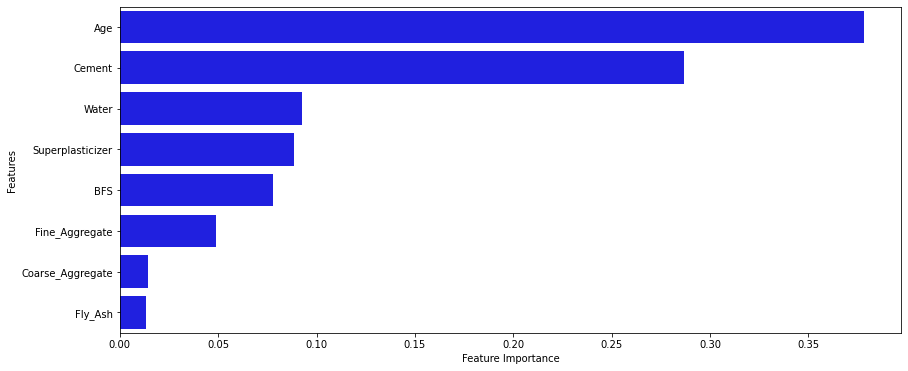

In [66]:
fig, ax = plt.subplots(figsize=(14,6))
feat_imp_gb = pd.DataFrame({"Features":X.columns, "Feature Importance": models["GB"].feature_importances_}).sort_values("Feature Importance", ascending=False)
sns.barplot(data=feat_imp_gb,y="Features", x="Feature Importance", color="Blue")
fig.savefig('Gradient Boosting Feature Importance.jpg');

fig, ax = plt.subplots(figsize=(18, 10))
plot_tree(
    models["RF"],
    filled=True,
    max_depth=2,
    node_ids=True,
    feature_names=X_train.columns,
    class_names=y.name
)
plt.savefig("RF tree.png");

### Plots

### CV

In [67]:
cv3_scores = []
cv3_std = []
cv5_scores = []
cv5_std = []
cv10_scores = []
cv10_std = []

for model in models.values():
    scores = cross_val_score(model, X_train, y_train, cv=3, n_jobs=-1, verbose=1)
    cv3_scores.append(round(scores.mean(), 4))
    cv3_std.append(round(scores.std(), 4))

for model in models.values():
    scores = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1, verbose=1)
    cv5_scores.append(round(scores.mean(), 4))
    cv5_std.append(round(scores.std(), 4))

for model in models.values():
    scores = cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, verbose=1)
    cv10_scores.append(round(scores.mean(), 4))
    cv10_std.append(round(scores.std(), 4))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

In [68]:
cv_result = pd.DataFrame({'3-fold CV Accuracy':cv3_scores, '5-fold CV Accuracy':cv5_scores, '10-fold CV Accuracy':cv10_scores,
                          'Std 3-fold CV Accuracy':cv3_std, 'Std 5-fold CV Accuracy':cv5_std, 'Std 10-fold CV Accuracy':cv10_std}, index=models.keys())

In [69]:
cv_result

,3-fold CV Accuracy,5-fold CV Accuracy,10-fold CV Accuracy,Std 3-fold CV Accuracy,Std 5-fold CV Accuracy,Std 10-fold CV Accuracy
LR,0.6017,0.5935,0.5892,0.0285,0.0447,0.0674
DT,0.7929,0.7977,0.8024,0.0372,0.0316,0.0561
RF,0.8799,0.8878,0.8914,0.0115,0.0077,0.0222
GB,0.9018,0.9143,0.9160,0.0136,0.0099,0.0205
KNN,0.6711,0.6943,0.7021,0.0217,0.0741,0.0859


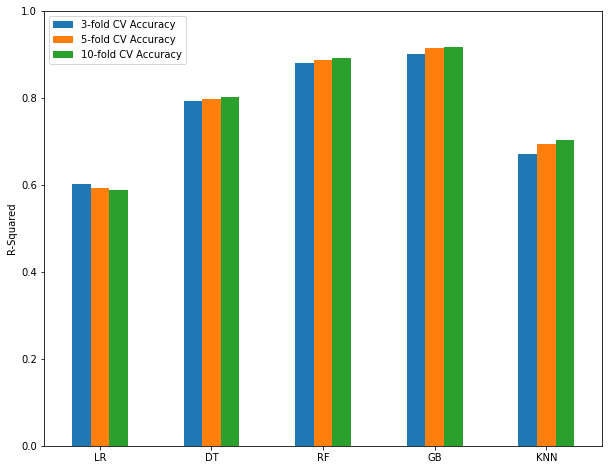

In [70]:
cv_result[['3-fold CV Accuracy','5-fold CV Accuracy','10-fold CV Accuracy']].plot(kind='bar',figsize=(10, 8))
plt.ylabel('R-Squared')
plt.ylim([0, 1])
plt.xticks(rotation=0)
plt.legend();
plt.savefig('cv_score.jpg')

In [71]:
import joblib
joblib.dump(models["GB"], "cement_model_GB.sav")

['cement_model_GB.sav']